In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("Social_Network_Ads.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [3]:
Q1 = data['EstimatedSalary'].quantile(0.25)
Q3 = data['EstimatedSalary'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data['EstimatedSalary'] = np.where(
    data['EstimatedSalary'] < lower, lower,
    np.where(data['EstimatedSalary'] > upper, upper,
             data['EstimatedSalary'])
)

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [5]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000.0,0
1,15810944,1,35,20000.0,0
2,15668575,0,26,43000.0,0
3,15603246,0,27,57000.0,0
4,15804002,1,19,76000.0,0
5,15728773,1,27,58000.0,0
6,15598044,0,27,84000.0,0
7,15694829,0,32,150000.0,1
8,15600575,1,25,33000.0,0
9,15727311,0,35,65000.0,0


In [6]:
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

sc = MinMaxScaler()

X_train[['EstimatedSalary']] = sc.fit_transform(X_train[['EstimatedSalary']])
X_test[['EstimatedSalary']] = sc.transform(X_test[['EstimatedSalary']])

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = model.predict(X_test)

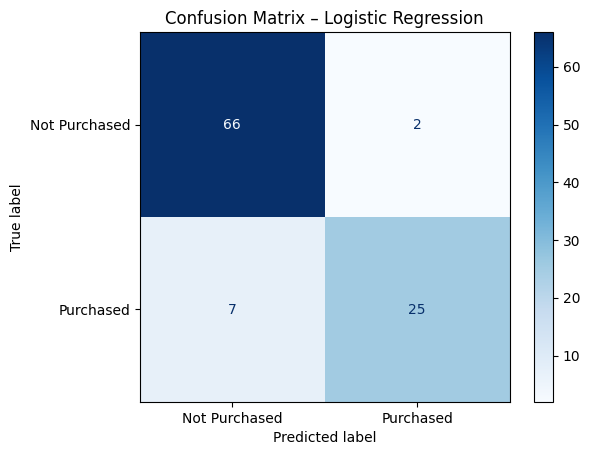

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Not Purchased", "Purchased"])

disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

In [11]:
TN, FP, FN, TP = cm.ravel()

print("TP =", TP)
print("FP =", FP)
print("TN =", TN)
print("FN =", FN)

TP = 25
FP = 2
TN = 66
FN = 7


In [12]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy =", accuracy)

Accuracy = 0.91


In [13]:
error_rate = 1 - accuracy
print("Error rate =", error_rate)

Error rate = 0.08999999999999997


In [14]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision =", precision)
print("Recall =", recall)

Precision = 0.9259259259259259
Recall = 0.78125
